<a href="https://colab.research.google.com/github/Andikadreams/PCVK_Semester5_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D. TUGAS PRAKTIKUM**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
seperti biasa.

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

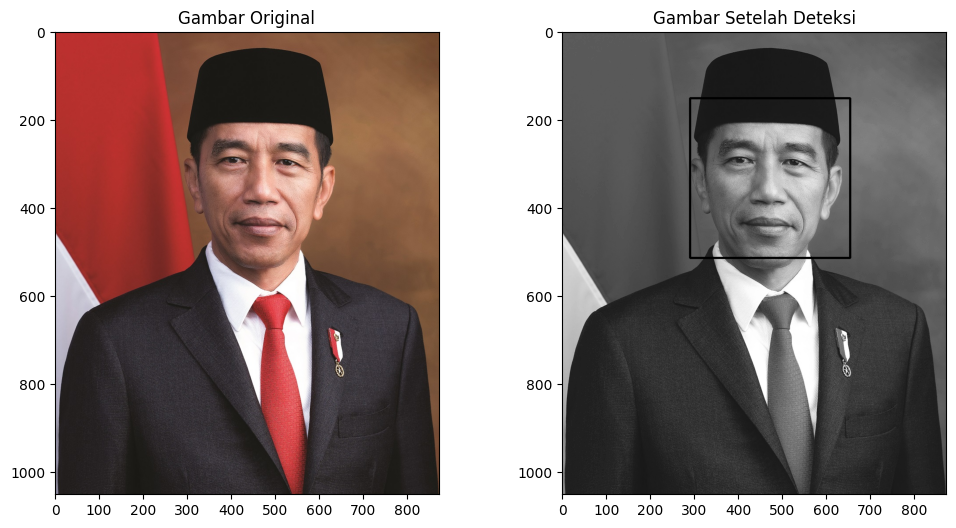

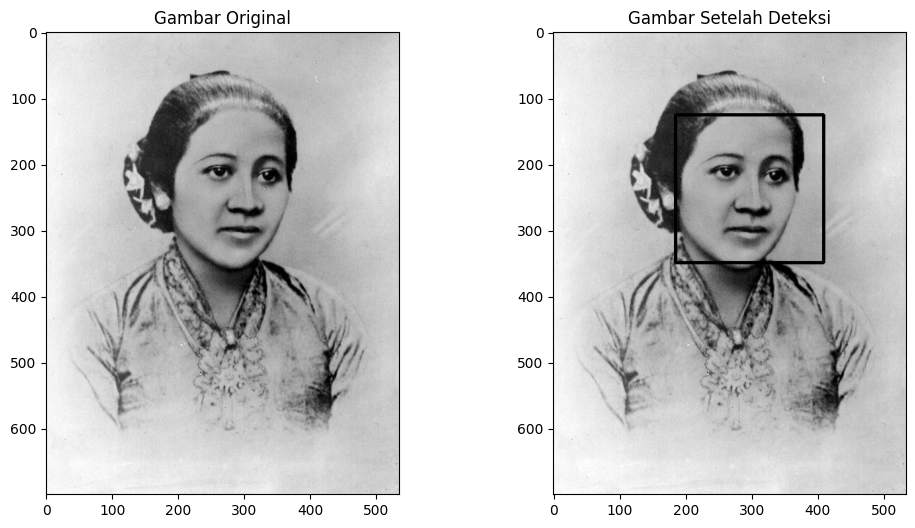

Gagal membaca gambar atau gambar tidak ada.


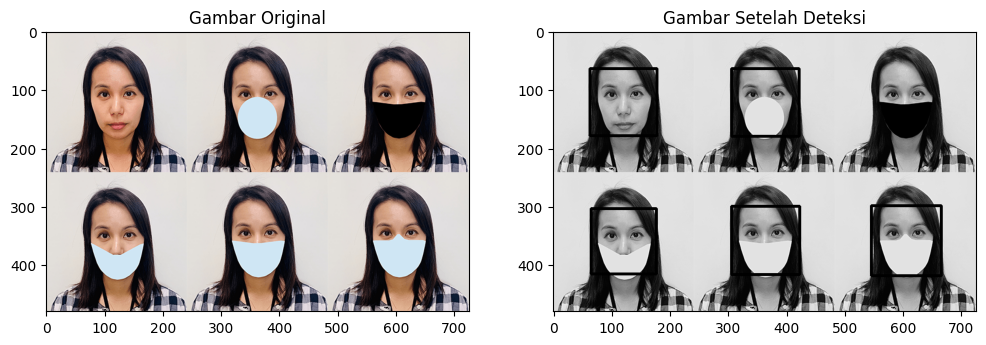

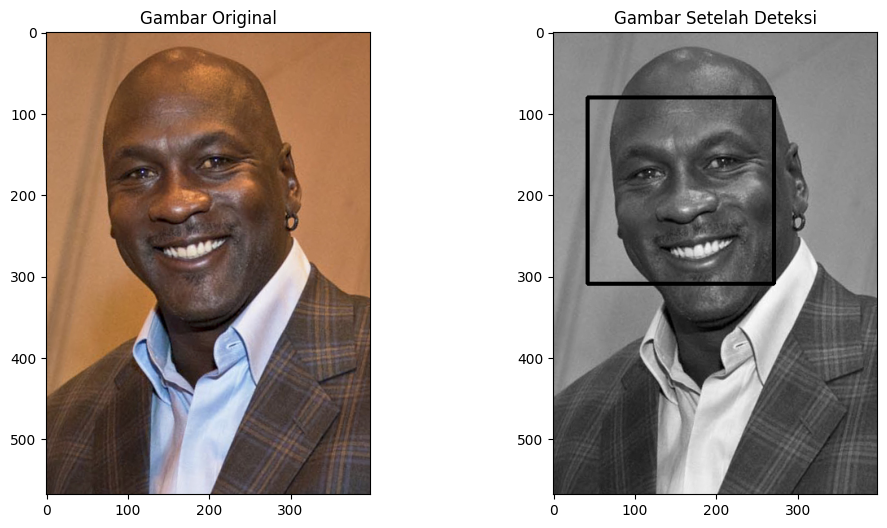

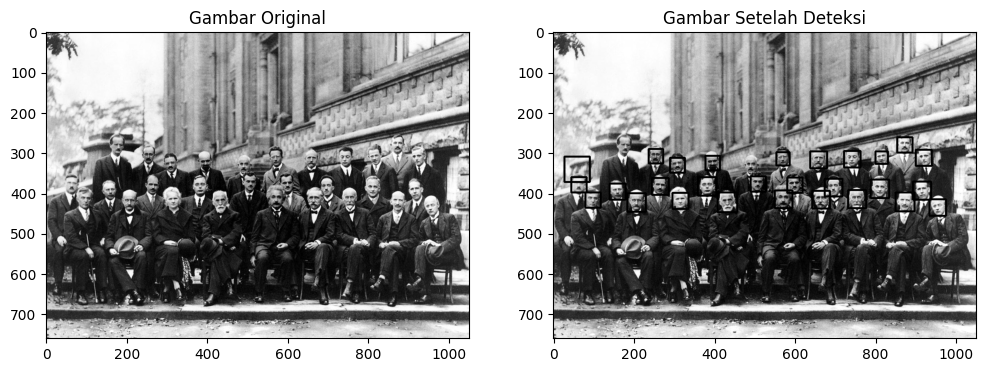

In [ ]:
# Inisialisasi classifier wajah
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/facedet/haarcascade_frontalface_alt.xml')

# Fungsi untuk menampilkan gambar dengan kotak di sekitar wajah
def face_detection(image_path, cascade_classifier):
    img = cv.imread(image_path)

    if img is not None:
        gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        # Deteksi wajah
        roi_wajah = cascade_classifier.detectMultiScale(gray_img)

        # Gambar kotak di sekitar wajah pada gambar setelah deteksi
        for (x, y, w, h) in roi_wajah:
            cv.rectangle(gray_img, (x, y), (x+w, y+h), (0, 255, 0), 3)

        # Tampilkan gambar asli tanpa kotak di sekitar wajah
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title('Gambar Original')

        # Tampilkan gambar setelah deteksi
        plt.subplot(1, 2, 2)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Gambar Setelah Deteksi')

        plt.show()
    else:
        print("Gagal membaca gambar atau gambar tidak ada.")


# Jokowi
face_detection('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg', cascade_wajah)

# RA.Kartini
face_detection('/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg', cascade_wajah)

# Kucing
face_detection('/content/drive/MyDrive/PCVK/Images/facedet/kucing2.jpg', cascade_wajah)

# Perempuan Maskeran
face_detection('/content/drive/MyDrive/PCVK/Images/facedet/mask.png', cascade_wajah)

# M. Jordan
face_detection('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg', cascade_wajah)

# Kelompok
face_detection('/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg', cascade_wajah)

Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection
dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah
bermasker, atau wajah yang berukuran kecil (solvay).

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

<Figure size 1000x1000 with 0 Axes>

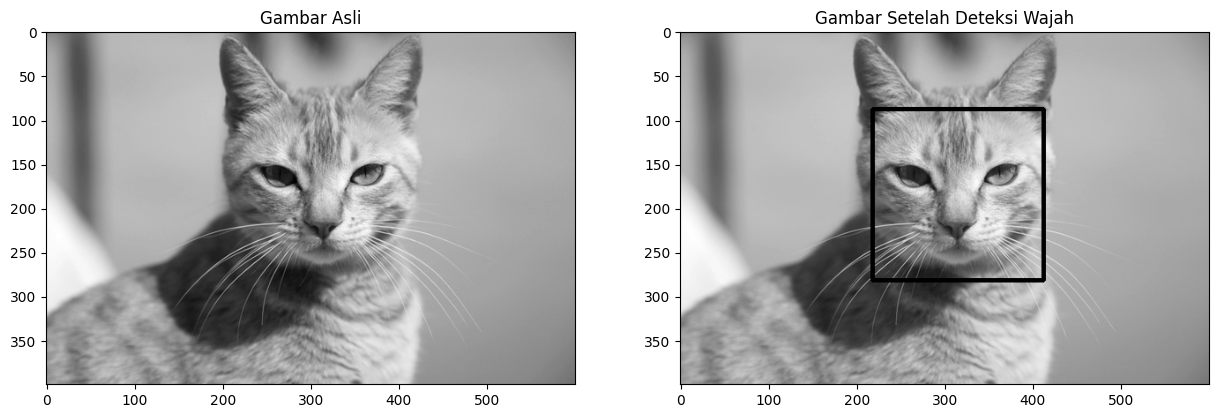

In [ ]:
# Nomor 3 (Cat Face Det)
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/facedet/haarcascade_frontalcatface.xml')

kucing = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mycat.jpg', 0)
kucing1 = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mycat.jpg', 0)

# Penyesuaian parameter
scaleFactor = 1.03
minNeighbors = 60
minSize = (100, 100)

roi_wajah = cascade_wajah.detectMultiScale(kucing1, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)

for (x, y, w, h) in roi_wajah:
    cv.rectangle(kucing1, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Konversi tipe data citra ke uint8
kucing = kucing.astype('uint8')
kucing1 = kucing1.astype('uint8')

plt.figure(figsize=(10, 10))
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121), plt.imshow(kucing, cmap='gray')
plt.title('Gambar Asli')
plt.subplot(122), plt.imshow(kucing1, cmap='gray')
plt.title('Gambar Setelah Deteksi Wajah')
plt.show()


4. Cobakan juga untuk eyes detection.

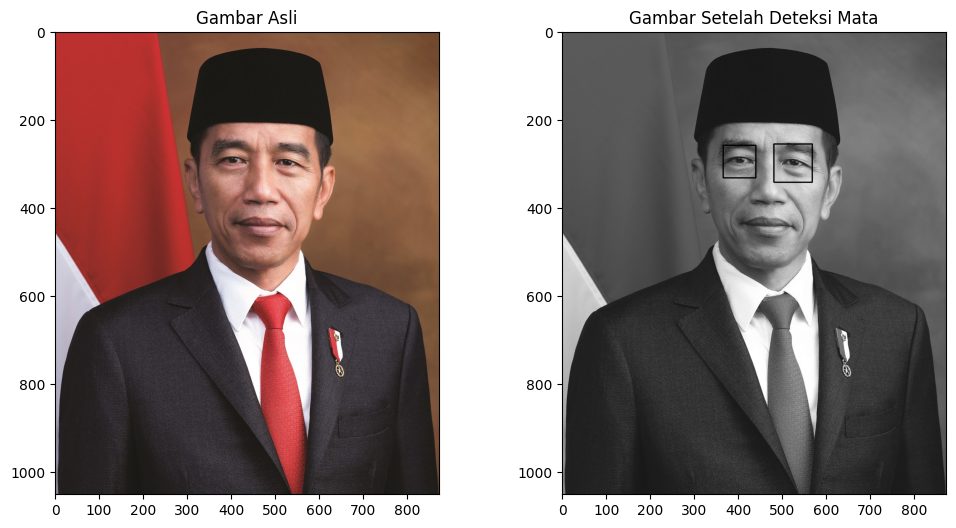

In [ ]:
# Path gambar
image_path = '/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg'

# Baca gambar
jokowi_img = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')
jokowi_gray = cv.cvtColor(jokowi_img, cv.COLOR_BGR2GRAY)

# Salin gambar untuk digunakan dalam deteksi mata
jokowi_img_eyes = jokowi_gray.copy()

# Gunakan classifier mata bawaan OpenCV
cascade_eyes = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

# Deteksi mata
roi_eyes = cascade_eyes.detectMultiScale(jokowi_gray)

# Gambar kotak di sekitar mata pada gambar asli
for (ex, ey, ew, eh) in roi_eyes:
    cv.rectangle(jokowi_img_eyes, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Tampilkan gambar asli
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(jokowi_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

# Tampilkan gambar setelah deteksi mata
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(jokowi_img_eyes, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Deteksi Mata')
plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

<IPython.core.display.Javascript object>

(480, 640)
Saved to Aul.jpg


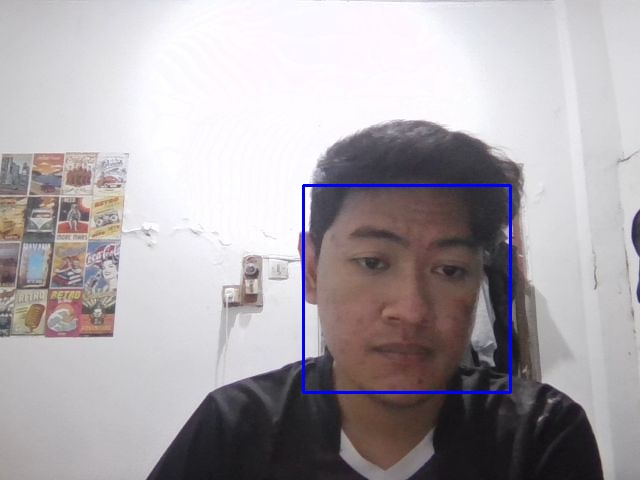

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/facedet/haarcascade_frontalface_alt.xml')
def take_photo(filename='Kelompok8.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('Aul.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

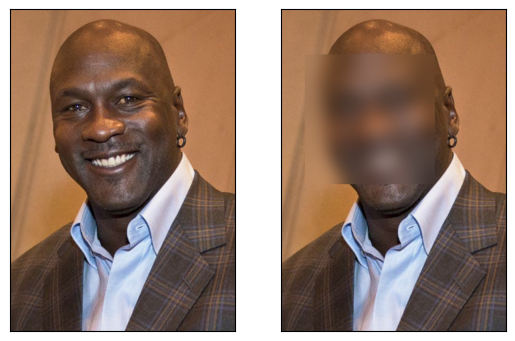

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def face_recognition_blur(img, scaleFactor, minNeighbors):
 # Mengcopy gambar yang akan ditambahkan gambar smile
 img_rectangle = img.copy()

 # Merubah gambar menjadi gray
 img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

 # Mengimport file xml yang berisikan algoritm haar cascade yang akan digunakan untuk face detection
 haar_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/facedet/haarcascade_frontalface_alt.xml')

 # Memasukkan gambar, scaleFactor, dan minNeightbors untuk dilakukan face detection kemudian dicari koordinatnya
 rectangle = haar_cascade.detectMultiScale(img_gray, scaleFactor, minNeighbors)

 # Menggambar gambar buram pada koordinat yang didapat
 for (x, y, w, h) in rectangle:
    blurred_face = img_rectangle[y:y+h, x:x+w]
    blurred_face = cv.GaussianBlur(blurred_face, (99, 99), 0)
    img_rectangle[y:y+h, x:x+w] = blurred_face

 # Menampilkan gambar
 fig, ax = plt.subplots(1,2)
 ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
 ax[0].set_xticks([])
 ax[0].set_yticks([])
 ax[1].imshow(cv.cvtColor(img_rectangle, cv.COLOR_BGR2RGB))
 ax[1].set_xticks([])
 ax[1].set_yticks([])

 # Menampilkan gambar smile pada face detection
face_recognition_blur(cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg'), 1.1, 9)

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

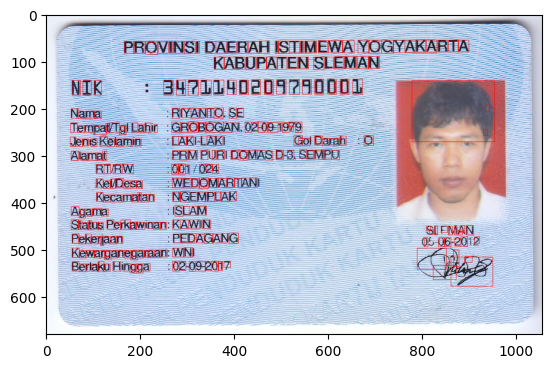

In [5]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
ktp_asli = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP_week7/ktp.png")
ktp = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP_week7/ktp.png")

# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

# GaussianBlur
# blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# GrayColor
gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)

# ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi
erode = cv.erode(gray.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Global Thresholding dengan v=90
global_threshold = global_thresholding(erode, 100)

# ret, thres = cv.threshold(global_threshold, 127, 255, cv.THRESH_BINARY)
# kernel = np.ones((3,3),np.uint8)
# opening = cv.morphologyEx(thres, cv.MORPH_OPEN, kernel)

# Ekstraksi kontur
contours, hierarchy = cv.findContours(global_threshold.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    # if h >=4  and w >= 4 and float(ras) <= 3:
    #   cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)


      #cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
erode = cv.cvtColor(erode, cv.COLOR_GRAY2RGB)
global_threshold = cv.cvtColor(global_threshold, cv.COLOR_GRAY2RGB)
ktp_asli = cv.cvtColor(ktp_asli, cv.COLOR_BGR2RGB)
# opening = cv.cvtColor(opening, cv.COLOR_BGR2RGB)
# blurred = cv.cvtColor(blurred, cv.COLOR_BGR2RGB)

# fig, axs = plt.subplots(1, 1, figsize=[20, 10], sharex=True, sharey=True)
# fig.suptitle('TAMPILAN PROSES')
# axs[0, 0].imshow(ktp_asli)
# axs[0, 0].set_title('KTP ASLI')
# # axs[0, 1].imshow(blurred)
# # axs[0, 1].set_title('HASIL BLUR')
# axs[0, 1].imshow(gray,cmap='gray')
# axs[0, 1].set_title('HASIL GRAY')
# axs[0, 2].imshow(erode)
# axs[0, 2].set_title('HASIL EROSI')
# axs[1, 0].imshow(global_threshold)
# axs[1, 0].set_title('HASIL GLOBAL')
# axs[1, 1].imshow(opening)
# axs[1, 1].set_title('HASIL OPENING')
# axs[0, 0].imshow(ktp_rgb)
# axs[0, 0].set_title('HASIL CONTOUR')
plt.imshow(ktp_rgb)

8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

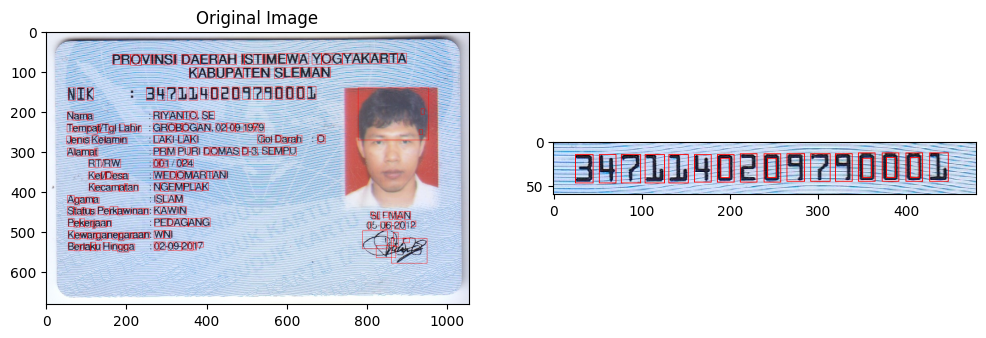

In [44]:
import cv2
import matplotlib.pyplot as plt

def cutting(image, x, y, width, height):
    # Crop the region of interest from the image
    hasil = image[y:y+height, x:x+width]

    return hasil

img = cv2.cvtColor(ktp_rgb, cv2.COLOR_BGR2RGB)
img_copy = img.copy()

# Tentukan koordinat untuk crop
x, y, width, height = 225, 125, 480, 60

img_crop = cutting(ktp_rgb, x, y, width, height)

img_rgb = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)


# Tampilkan gambar asli
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Tampilkan hasil cropping
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

plt.show()

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [ ]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle
# Direktori data training
DATADIR = "dataset/training"
dirs = []
training_data = []
width, height = 100, 100
# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
dirs.append(char_name)
# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
path = os.path.join(DATADIR, char_name)
class_number = dirs.index(char_name)
for img in tqdm(os.listdir(path)):
try:
img_array = cv2.imread(os.path.join(data_dir_testing, car,
char_image), cv2.IMREAD_ANYCOLOR)
new_array = cv2.resize(img_array, (width, height))
training_data.append([new_array, class_number])
except Exception as e:
pass
random.shuffle(training_data)
X = []
Y = []
for feature, label in training_data:
X.append(feature)
Y.append(label)
X = np.array(X).reshape(-1, width, height, 1)
# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

10. Lakukan Training Data

In [ ]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,
ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100
# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)
# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)
adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

11. Testing Data

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
data_dir_training = "dataset/training-bak"
data_dir_testing = "dataset/testing"
dirs = []
width, height = 100, 100
model = tf.keras.models.load_model("anpr.model")
for char_name in sorted(os.listdir(data_dir_training)):
dirs.append(char_name)
for car in sorted(os.listdir(data_dir_testing)):
temp = ""
for char_img in sorted(os.listdir(os.path.join(data_dir_testing,
car))):
img_array = cv2.imread(os.path.join(data_dir_testing, car,
char_img), cv2.IMREAD_ANYCOLOR)
new_array = cv2.resize(img_array, (width, height))
new_array = np.array(new_array).reshape(-1, width, height,
1)
new_array = new_array / 255.0
prediction = model.predict(new_array)
temp += dirs[np.argmax(prediction[0])]
print("folder name: {} no: {}".format(car, temp))